# Twitter Sentiment Analysis

## Importing libraries

In [1]:
from textblob import TextBlob
import csv
import tweepy
import unidecode
import matplotlib.pyplot as plt
import pandas as pd

## Authentication (Twitter API)

In [2]:
f = open('auth.k','r')
ak = f.readlines()
f.close()
auth1 = tweepy.auth.OAuthHandler(ak[0].replace("\n",""), ak[1].replace("\n",""))
auth1.set_access_token(ak[2].replace("\n",""), ak[3].replace("\n",""))
api = tweepy.API(auth1)

## Initialising the parameters

In [3]:
target_num = 50
query = "olympics"

## Main routine

In [4]:
csvFile = open('results_olympics.csv','w')
csvWriter = csv.writer(csvFile)
csvWriter.writerow(["username","author id","created", "text", "retwc", "hashtag", "followers", "friends","polarity","subjectivity"])
counter = 0

for tweet in tweepy.Cursor(api.search, q = query, lang = "en", result_type = "popular", count = target_num).items():
    created = tweet.created_at
    text = tweet.text
    text = unidecode.unidecode(text) 
    retwc = tweet.retweet_count
    try:
        hashtag = tweet.entities[u'hashtags'][0][u'text'] #hashtags used
    except:
        hashtag = "None"
    username  = tweet.author.name            #author/user name
    authorid  = tweet.author.id              #author/user ID#
    followers = tweet.author.followers_count #number of author/user followers (inlink)
    friends = tweet.author.friends_count     #number of author/user friends (outlink)

    text_blob = TextBlob(text)
    polarity = text_blob.polarity
    subjectivity = text_blob.subjectivity
    csvWriter.writerow([username, authorid, created, text, retwc, hashtag, followers, friends, polarity, subjectivity])

    counter = counter + 1
    if (counter == target_num):
        break

csvFile.close()

## Analysis about the computed result

### Loading the CSV file

In [5]:
twitter_data = pd.read_csv('results_olympics.csv')

### Corelation about the twitter data

In [6]:
print(twitter_data.corr())

              author id     retwc  followers   friends  polarity  subjectivity
author id      1.000000 -0.069119  -0.048261 -0.091687  0.083469     -0.043245
retwc         -0.069119  1.000000  -0.040044  0.089613 -0.170261     -0.085740
followers     -0.048261 -0.040044   1.000000 -0.095496  0.111333      0.010572
friends       -0.091687  0.089613  -0.095496  1.000000  0.017473      0.049648
polarity       0.083469 -0.170261   0.111333  0.017473  1.000000      0.593550
subjectivity  -0.043245 -0.085740   0.010572  0.049648  0.593550      1.000000


### Plotting the data

#### Scatterplot between the retweets and polarity of data

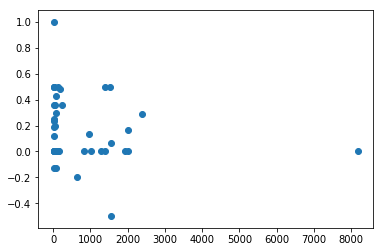

In [7]:
plt.scatter(twitter_data['retwc'], twitter_data['polarity'])
plt.show()

This plot shows how the neutral/negative tweets usually get more retweets.

#### Scatterplot between the retweets and subjectivity of data

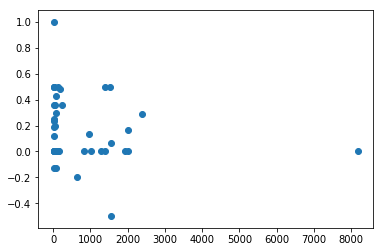

In [8]:
plt.scatter(twitter_data['retwc'], twitter_data['polarity'])
plt.show()

#### Scatterplot between the retweets and higher subjectivity of data

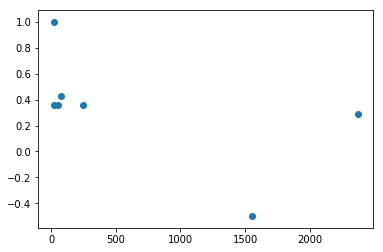

In [9]:
twitter_data_subjective = twitter_data[twitter_data['subjectivity'] > 0.5]
plt.scatter(twitter_data_subjective['retwc'], twitter_data_subjective['polarity'])
plt.show()

This plot kind of shows how more subjective data get higher retweets